In [1]:
""" Simple linear regression example in TensorFlow
This program tries to predict the number of thefts from 
the number of fire in the city of Chicago
Author: Chip Huyen
Prepared for the class CS 20SI: "TensorFlow for Deep Learning Research"
cs20si.stanford.edu
"""

' Simple linear regression example in TensorFlow\nThis program tries to predict the number of thefts from \nthe number of fire in the city of Chicago\nAuthor: Chip Huyen\nPrepared for the class CS 20SI: "TensorFlow for Deep Learning Research"\ncs20si.stanford.edu\n'

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

#import utils
import python_utils

DATA_FILE = 'data/fire_theft.xls'

In [3]:
# Phase 1: Assemble the graph
# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override='utf-8')
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

In [4]:
# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
# Both have the type float32
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

In [5]:
# Step 3: create weight and bias, initialized to 0
w = tf.Variable(0.0, name='weights')
b = tf.Variable(0.0, name='bias')

In [6]:
# Step 4: build model to predict Y
Y_predicted = X * w + b 

In [7]:
# Step 5: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name='loss')
# loss = utils.huber_loss(Y, Y_predicted)

In [8]:
# Step 6: using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [9]:
with tf.Session() as sess:
	# Step 7: initialize the necessary variables, in this case, w and b
	sess.run(tf.global_variables_initializer()) 
	
	writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
	
	# Step 8: train the model
	for i in range(50): # train the model 100 epochs
		total_loss = 0
		for x, y in data:
			# Session runs train_op and fetch values of loss
			_, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
			total_loss += l
		print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

	# close the writer when you're done using it
	writer.close() 
	
	# Step 9: output the values of w and b
	w, b = sess.run([w, b]) 

Epoch 0: 2069.6319333978354
Epoch 1: 2117.0123581953535
Epoch 2: 2092.302723001866
Epoch 3: 2068.5080461938464
Epoch 4: 2045.591184088162
Epoch 5: 2023.5146448101316
Epoch 6: 2002.2447619835536
Epoch 7: 1981.748338803649
Epoch 8: 1961.9944411260742
Epoch 9: 1942.9520116143283
Epoch 10: 1924.5930823644712
Epoch 11: 1906.8898800636332
Epoch 12: 1889.8164505837929
Epoch 13: 1873.347133841543
Epoch 14: 1857.4588400604468
Epoch 15: 1842.1278742424079
Epoch 16: 1827.332495119955
Epoch 17: 1813.0520579712022
Epoch 18: 1799.2660847636982
Epoch 19: 1785.9562132299961
Epoch 20: 1773.1024853109072
Epoch 21: 1760.689129482884
Epoch 22: 1748.6984157081515
Epoch 23: 1737.1138680398553
Epoch 24: 1725.920873066732
Epoch 25: 1715.1046249579008
Epoch 26: 1704.6500954309377
Epoch 27: 1694.5447134910141
Epoch 28: 1684.7746311347667
Epoch 29: 1675.328450968245
Epoch 30: 1666.1935385839038
Epoch 31: 1657.3584002084322
Epoch 32: 1648.8122658529207
Epoch 33: 1640.5440742547091
Epoch 34: 1632.5446836102221
Epo

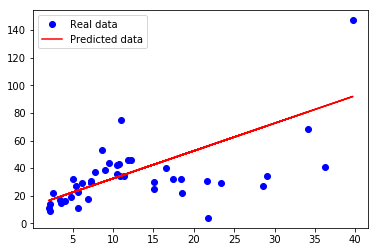

In [10]:
# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w + b, 'r', label='Predicted data')
plt.legend()
plt.show()

In [11]:
import os 
os.system('tensorboard --logdir="./graphs/linear_reg" --port 6006')

0

In [13]:
def huber_loss(labels, predictions, delta=1.0):
    residual = tf.abs(predictions - labels)
    condition = tf.less(residual, delta)
    small_res = 0.5 * tf.square(residual)
    large_res = delta * residual - 0.5 * tf.square(delta)
    
    # fix tf to version 0.12 change select to where 
    return tf.where(condition, small_res, large_res) 
    

In [7]:
# loss = tf.square(Y - Y_predicted, name='loss')
loss = tf.losses.huber_loss(Y, Y_predicted)
# loss = huber_loss(Y, Y_predicted)

In [8]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [9]:
with tf.Session() as sess:
	# Step 7: initialize the necessary variables, in this case, w and b
	sess.run(tf.global_variables_initializer()) 
	
	writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
	
	# Step 8: train the model
	for i in range(50): # train the model 100 epochs
		total_loss = 0
		for x, y in data:
			# Session runs train_op and fetch values of loss
			_, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
			total_loss += l
		print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

	# close the writer when you're done using it
	writer.close() 
	
	# Step 9: output the values of w and b
	w, b = sess.run([w, b]) 

Epoch 0: 30.231313444319227
Epoch 1: 24.488211881546746
Epoch 2: 19.95247097987504
Epoch 3: 18.415514595407462
Epoch 4: 17.62403281920013
Epoch 5: 17.08878264540718
Epoch 6: 16.827302360641106
Epoch 7: 16.676950227957043
Epoch 8: 16.589362557090464
Epoch 9: 16.547880798134777
Epoch 10: 16.54316401366322
Epoch 11: 16.53523531635957
Epoch 12: 16.527739029555093
Epoch 13: 16.520207939580793
Epoch 14: 16.51269836031965
Epoch 15: 16.505204298932636
Epoch 16: 16.497726049274206
Epoch 17: 16.490262628311203
Epoch 18: 16.48281567916274
Epoch 19: 16.475384406479343
Epoch 20: 16.467968803342607
Epoch 21: 16.460568067573366
Epoch 22: 16.453183558459084
Epoch 23: 16.445813909439103
Epoch 24: 16.438459956220218
Epoch 25: 16.431121296870213
Epoch 26: 16.42379860965801
Epoch 27: 16.41649028893915
Epoch 28: 16.409198701381683
Epoch 29: 16.401921452111786
Epoch 30: 16.394659822185833
Epoch 31: 16.38741318797249
Epoch 32: 16.38018172096816
Epoch 33: 16.37296574961926
Epoch 34: 16.36576510500163
Epoch 35

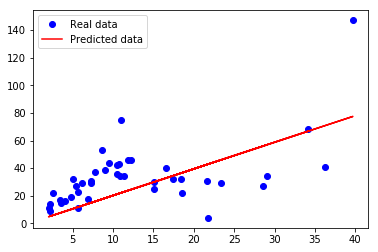

In [10]:
# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w + b, 'r', label='Predicted data')
plt.legend()
plt.show()